In [ ]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from models.random_forest import random_forest_session
from models.random_forest import run_backtest
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed\session'
model_output_filepath = rf'{notebook_path}\output\model\random_forest'

 **Trading session/sub-session times (NYC time):**

- asian: 19:00 (prev day) - 04:00
- asian_morning: 19:00 (prev day) - 01:00
- london: 03:00 - 12:00
- london_morning: 03:00 - 07:00
- london_afternoon: 07:00 - 12:00
- ny: 08:00 - 17:00
- ny_morning: 08:00 - 12:00
- ny_evening: 12:00 - 17:00

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 260
Training days: 156, Testing days: 52, Backtesting days: 52
{'Accuracy': 0.5365853658536586, 'Confusion Matrix': array([[242,   7],
       [221,  22]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.97      0.68       249\n           1       0.76      0.09      0.16       243\n\n    accuracy                           0.54       492\n   macro avg       0.64      0.53      0.42       492\nweighted avg       0.64      0.54      0.42       492\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 549
     tick                   datetime    price  predicted  actual  fx_return  \
0    3815  2024-10-18 09:13:00-04:00  1.30584          0       1   0.083532   
1    3816  2024-10-18 09:55:00-04:00  1.30484      

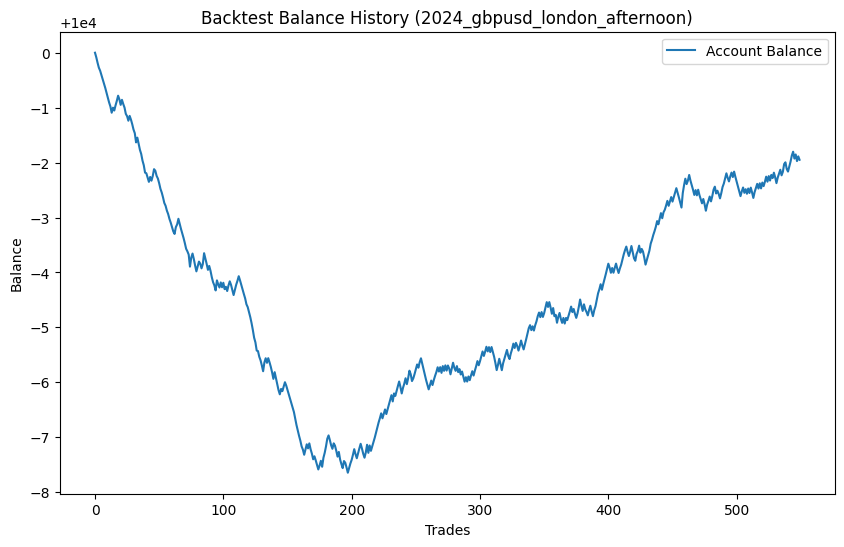

In [2]:
# Step 1: Loading the Data
year = "2024"
ccy = "gbpusd"
session = "london_afternoon"
file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
# Load the dataset
df = pd.read_csv(file_path)
backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 291
Training days: 174, Testing days: 58, Backtesting days: 59
{'Accuracy': 0.476, 'Confusion Matrix': array([[110,   3],
       [128,   9]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.46      0.97      0.63       113\n           1       0.75      0.07      0.12       137\n\n    accuracy                           0.48       250\n   macro avg       0.61      0.52      0.37       250\nweighted avg       0.62      0.48      0.35       250\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 311
     tick                   datetime    price  predicted  actual  fx_return  \
0    3851  2024-10-23 02:38:00-04:00  1.29784          0       0  -0.088536   
1    3852  2024-10-23 03:02:00-04:00  1.29684          1

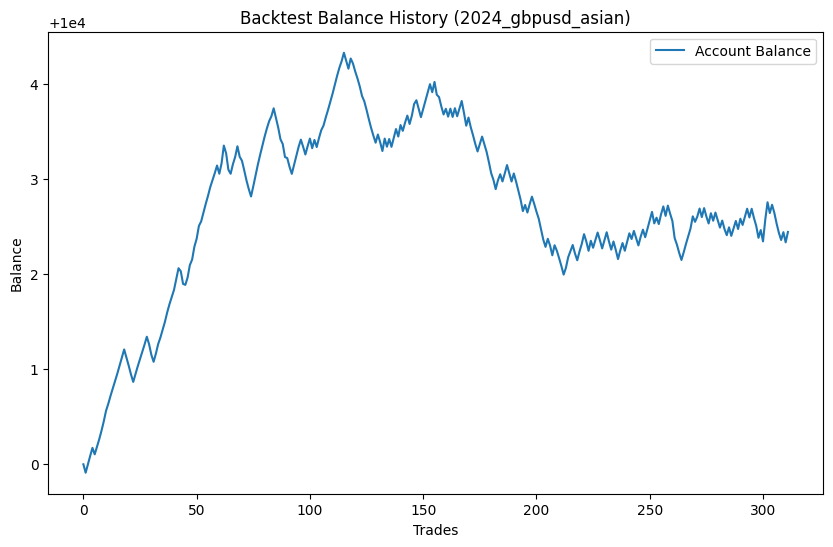

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 251
Training days: 150, Testing days: 50, Backtesting days: 51
{'Accuracy': 0.4634146341463415, 'Confusion Matrix': array([[ 9, 53],
       [13, 48]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.41      0.15      0.21        62\n           1       0.48      0.79      0.59        61\n\n    accuracy                           0.46       123\n   macro avg       0.44      0.47      0.40       123\nweighted avg       0.44      0.46      0.40       123\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 261
     tick                   datetime    price  predicted  actual  fx_return  \
0    2335  2024-10-30 03:09:00-04:00  1.08327          0       1   0.101636   
1    2336  2024-10-30 03:30:00-04:00  1.08427  

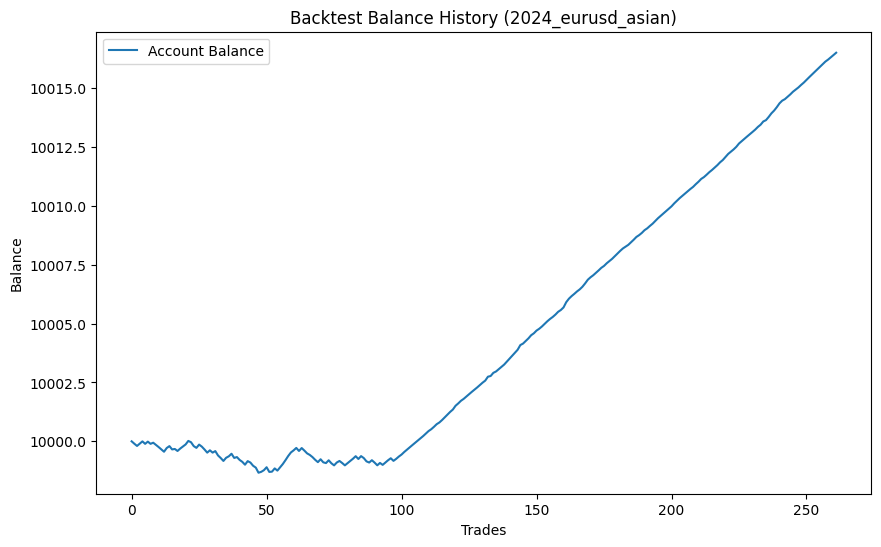

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 310
Training days: 186, Testing days: 62, Backtesting days: 62
{'Accuracy': 0.5267665952890792, 'Confusion Matrix': array([[303, 393],
       [270, 435]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.44      0.48       696\n           1       0.53      0.62      0.57       705\n\n    accuracy                           0.53      1401\n   macro avg       0.53      0.53      0.52      1401\nweighted avg       0.53      0.53      0.52      1401\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 1225
       tick                   datetime    price  predicted  actual  fx_return  \
0     10387  2024-10-21 00:03:00-04:00  149.243          0       1   0.071075   
1     10388  2024-10-21 00:38:00-04:00

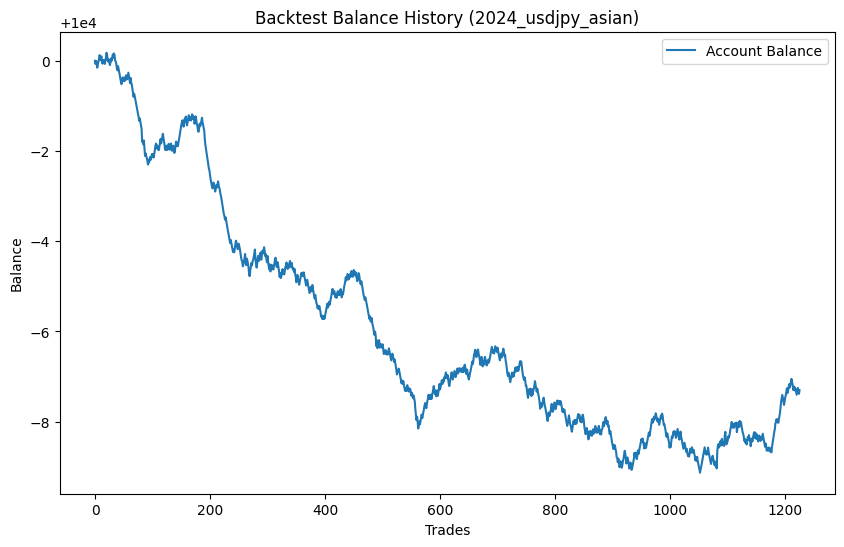

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 163
Training days: 97, Testing days: 32, Backtesting days: 34
{'Accuracy': 0.5081967213114754, 'Confusion Matrix': array([[ 0, 28],
       [ 2, 31]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        28\n           1       0.53      0.94      0.67        33\n\n    accuracy                           0.51        61\n   macro avg       0.26      0.47      0.34        61\nweighted avg       0.28      0.51      0.36        61\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 69
    tick                   datetime    price  predicted  actual  fx_return  \
0    947  2024-11-01 01:57:00-04:00  0.84292          1       0  -0.123229   
1    948  2024-11-01 03:12:00-04:00  0.84192       

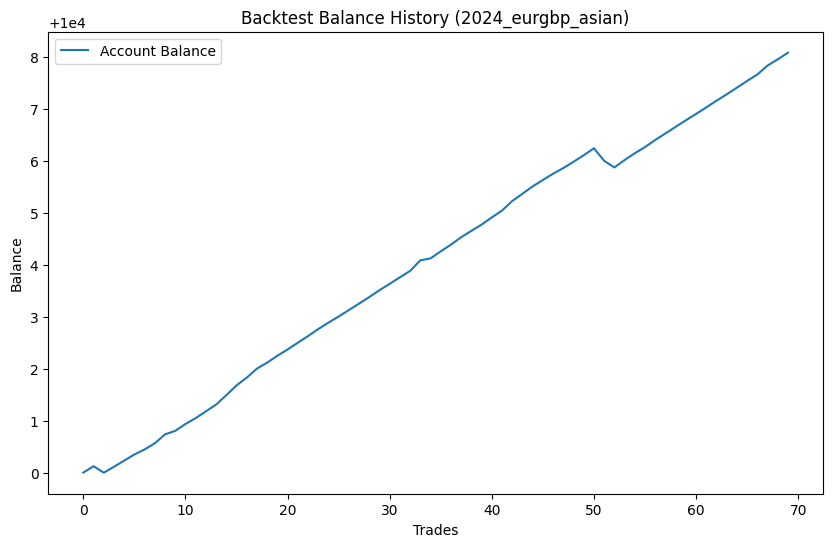

In [12]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 201
Training days: 120, Testing days: 40, Backtesting days: 41
{'Accuracy': 0.44871794871794873, 'Confusion Matrix': array([[34,  0],
       [43,  1]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.44      1.00      0.61        34\n           1       1.00      0.02      0.04        44\n\n    accuracy                           0.45        78\n   macro avg       0.72      0.51      0.33        78\nweighted avg       0.76      0.45      0.29        78\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 139
     tick                   datetime    price  predicted  actual  fx_return  \
0    3914  2024-10-29 20:27:00-04:00  1.30184          0       1   0.083023   
1    3915  2024-10-29 21:01:00-04:00  1.30084 

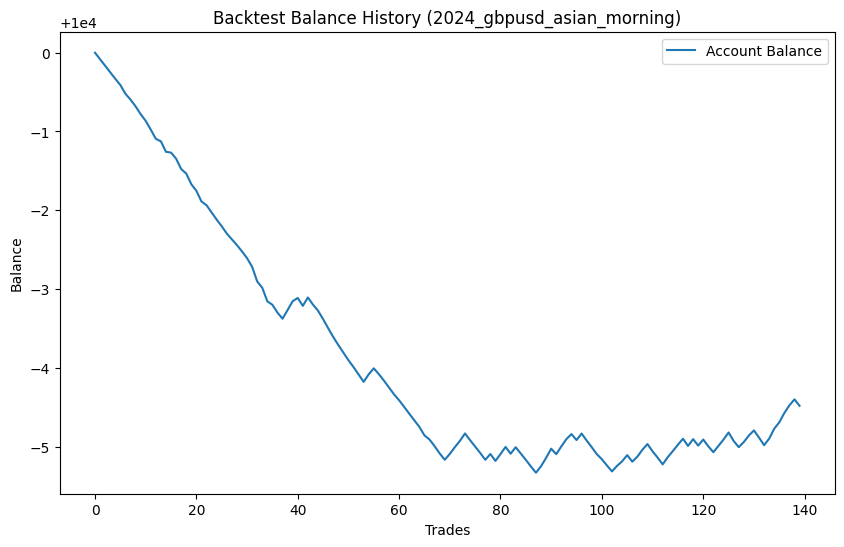

Unique session days: 169
Training days: 101, Testing days: 33, Backtesting days: 35


c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


{'Accuracy': 0.47058823529411764, 'Confusion Matrix': array([[19,  4],
       [23,  5]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.45      0.83      0.58        23\n           1       0.56      0.18      0.27        28\n\n    accuracy                           0.47        51\n   macro avg       0.50      0.50      0.43        51\nweighted avg       0.51      0.47      0.41        51\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 123
     tick                  datetime    price  predicted  actual  fx_return  \
0    2403 2024-11-05 19:09:00-05:00  1.09227          0       0  -0.158203   
1    2404 2024-11-05 19:12:00-05:00  1.09127          1       0  -0.080601   
2    2405 2024-11-05 19:14:00-05:00  1.09027          

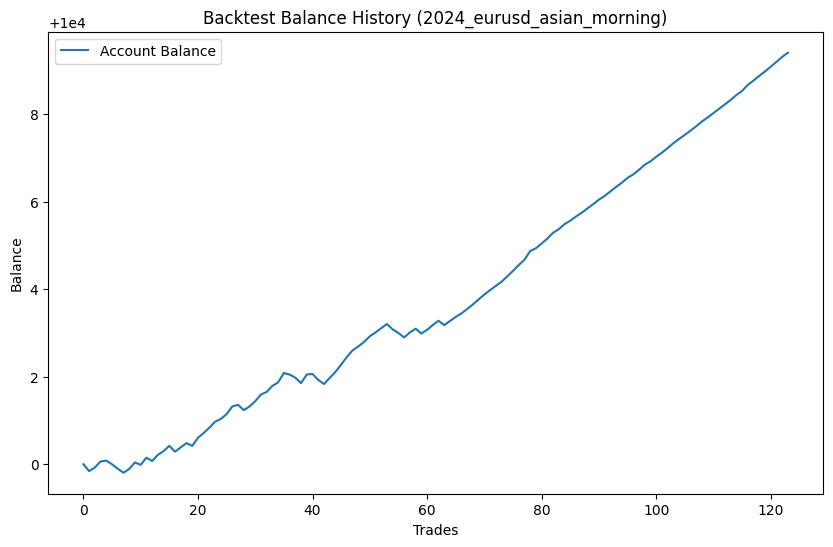

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 292
Training days: 175, Testing days: 58, Backtesting days: 59
{'Accuracy': 0.5185643564356436, 'Confusion Matrix': array([[169, 243],
       [146, 250]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.41      0.46       412\n           1       0.51      0.63      0.56       396\n\n    accuracy                           0.52       808\n   macro avg       0.52      0.52      0.51       808\nweighted avg       0.52      0.52      0.51       808\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 751
      tick                   datetime    price  predicted  actual  fx_return  \
0    10447  2024-10-23 00:04:00-04:00  151.843          1       1   0.093578   
1    10448  2024-10-23 00:33:00-04:00  15

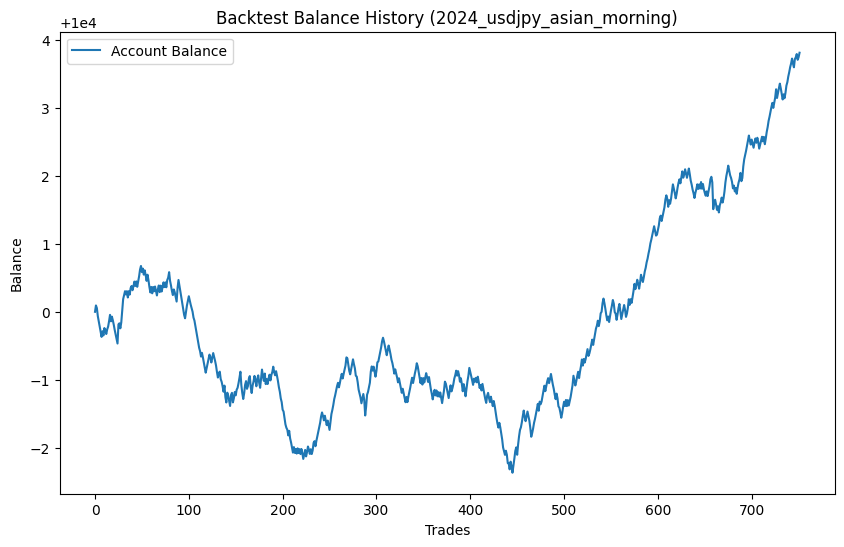

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')
c:\Users\mmori\Documents\fx_strategy_project\fx_strategy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mmori\Documents\fx_strategy_project\fx_strategy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being se

Unique session days: 64
Training days: 38, Testing days: 12, Backtesting days: 14
{'Accuracy': 0.8461538461538461, 'Confusion Matrix': array([[ 0,  2],
       [ 0, 11]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           1       0.85      1.00      0.92        11\n\n    accuracy                           0.85        13\n   macro avg       0.42      0.50      0.46        13\nweighted avg       0.72      0.85      0.78        13\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'date', 'time', 'datetime_original',
       'lag_1', 'lag_2', 'lag_3', 'ticks_moved_lag_1', 'target'],
      dtype='object')
Test set size: 22
    tick                   datetime    price  predicted  actual  fx_return  \
0    907  2024-10-28 22:42:00-04:00  0.83392          1       1   0.138093   
1    915  2024-10-29 22:16:00-04:00  0.83192        

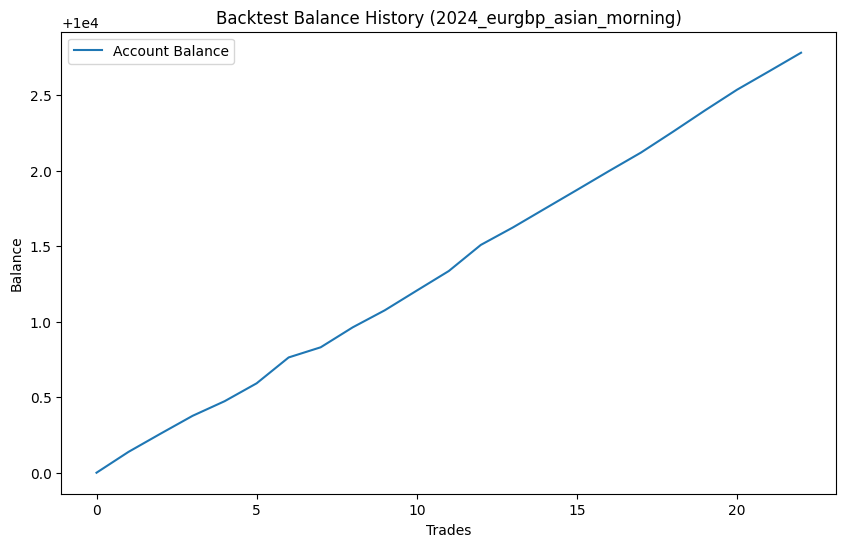

In [5]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 260
Training days: 156, Testing days: 52, Backtesting days: 52
{'Accuracy': 0.523224043715847, 'Confusion Matrix': array([[336,  29],
       [320,  47]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.92      0.66       365\n           1       0.62      0.13      0.21       367\n\n    accuracy                           0.52       732\n   macro avg       0.57      0.52      0.44       732\nweighted avg       0.57      0.52      0.43       732\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 824
     tick                   datetime    price  predicted  actual  fx_return  \
0    3810  2024-10-18 04:11:00-04:00  1.30484          1       0  -0.066631   
1    3811  2024-10-18 04:47:00-04:00  1.30384       

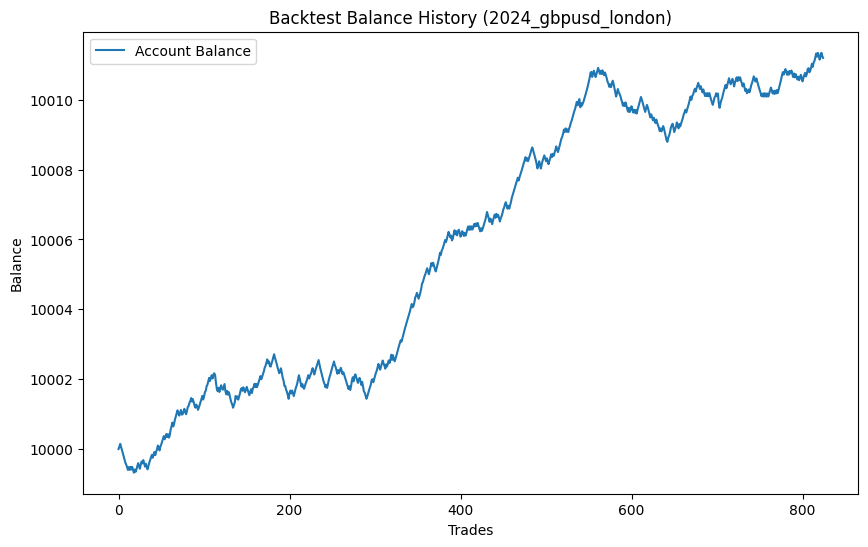

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 259
Training days: 155, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.524390243902439, 'Confusion Matrix': array([[200,  17],
       [178,  15]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.92      0.67       217\n           1       0.47      0.08      0.13       193\n\n    accuracy                           0.52       410\n   macro avg       0.50      0.50      0.40       410\nweighted avg       0.50      0.52      0.42       410\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 651
     tick                   datetime    price  predicted  actual  fx_return  \
0    2260  2024-10-17 05:41:00-04:00  1.08627          0       1   0.098598   
1    2261  2024-10-17 08:31:00-04:00  1.08427       

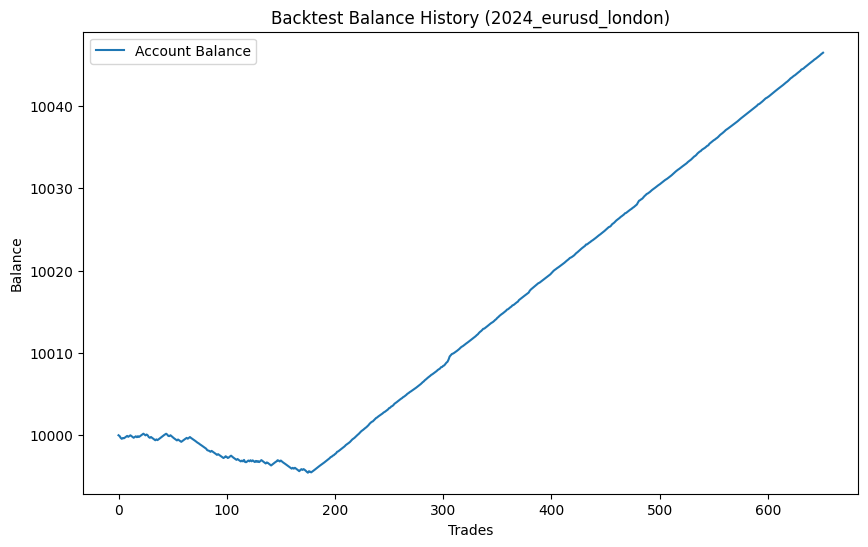

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 260
Training days: 156, Testing days: 52, Backtesting days: 52
{'Accuracy': 0.5318454001088732, 'Confusion Matrix': array([[409, 478],
       [382, 568]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.46      0.49       887\n           1       0.54      0.60      0.57       950\n\n    accuracy                           0.53      1837\n   macro avg       0.53      0.53      0.53      1837\nweighted avg       0.53      0.53      0.53      1837\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 1385
       tick                   datetime    price  predicted  actual  fx_return  \
0     10359  2024-10-18 03:21:00-04:00  150.043          1       1   0.102704   
1     10360  2024-10-18 04:05:00-04:00  150.14

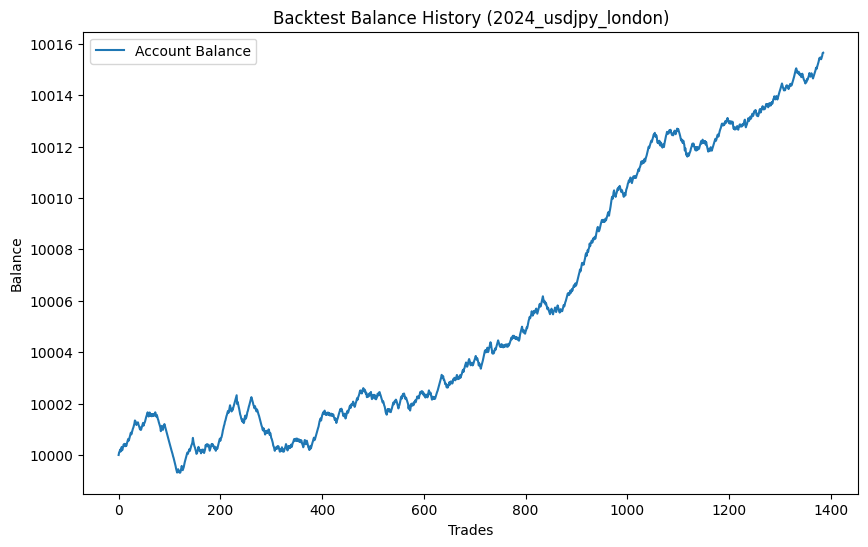

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 243
Training days: 145, Testing days: 48, Backtesting days: 50
{'Accuracy': 0.4855072463768116, 'Confusion Matrix': array([[26, 56],
       [15, 41]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.63      0.32      0.42        82\n           1       0.42      0.73      0.54        56\n\n    accuracy                           0.49       138\n   macro avg       0.53      0.52      0.48       138\nweighted avg       0.55      0.49      0.47       138\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 223
     tick                   datetime    price  predicted  actual  fx_return  \
0     875  2024-10-18 04:10:00-04:00  0.83092          1       1   0.145831   
1     876  2024-10-18 06:00:00-04:00  0.83192          

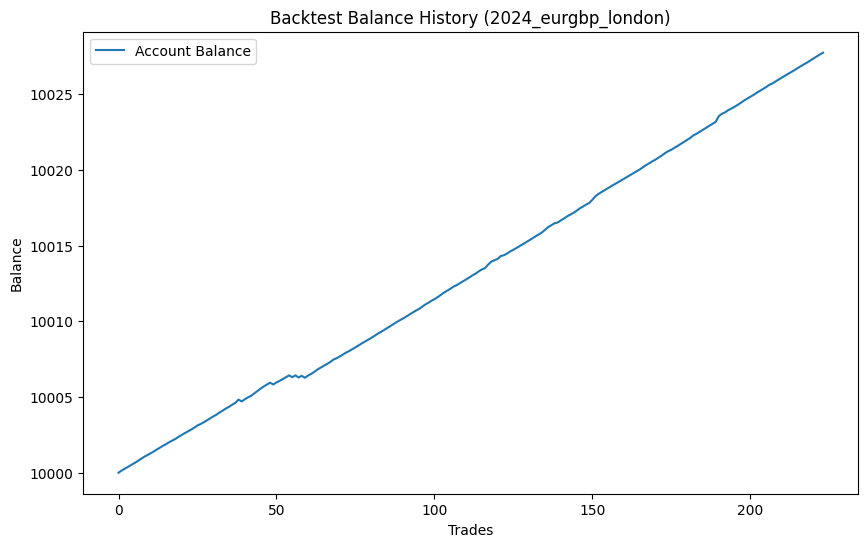

In [6]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 254
Training days: 152, Testing days: 50, Backtesting days: 52
{'Accuracy': 0.5020408163265306, 'Confusion Matrix': array([[ 12, 111],
       [ 11, 111]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.10      0.16       123\n           1       0.50      0.91      0.65       122\n\n    accuracy                           0.50       245\n   macro avg       0.51      0.50      0.40       245\nweighted avg       0.51      0.50      0.40       245\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 281
     tick                   datetime    price  predicted  actual  fx_return  \
0    3786  2024-10-17 03:02:00-04:00  1.29784          1       0  -0.072376   
1    3787  2024-10-17 03:31:00-04:00  1.29884      

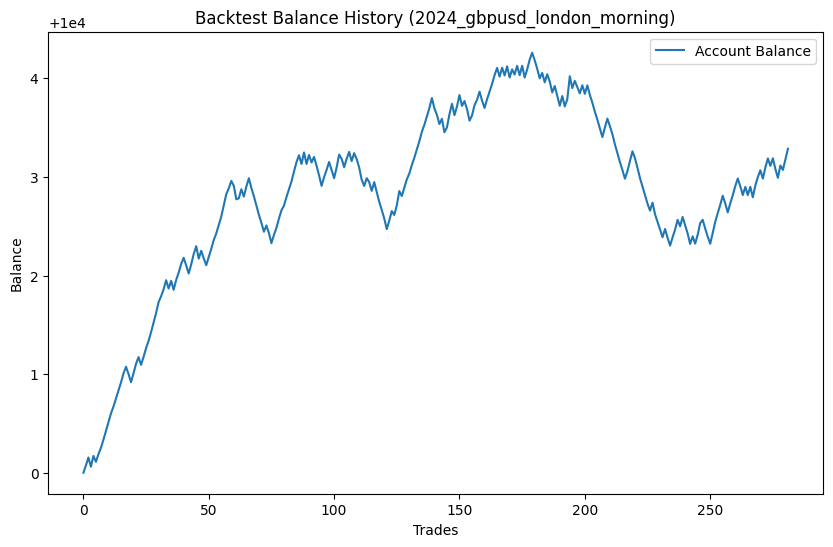

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 236
Training days: 141, Testing days: 47, Backtesting days: 48
{'Accuracy': 0.4672131147540984, 'Confusion Matrix': array([[54,  7],
       [58,  3]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.89      0.62        61\n           1       0.30      0.05      0.08        61\n\n    accuracy                           0.47       122\n   macro avg       0.39      0.47      0.35       122\nweighted avg       0.39      0.47      0.35       122\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 216
     tick                   datetime    price  predicted  actual  fx_return  \
0    2300  2024-10-24 03:26:00-04:00  1.07727          1       0  -0.104797   
1    2301  2024-10-24 03:31:00-04:00  1.07927          

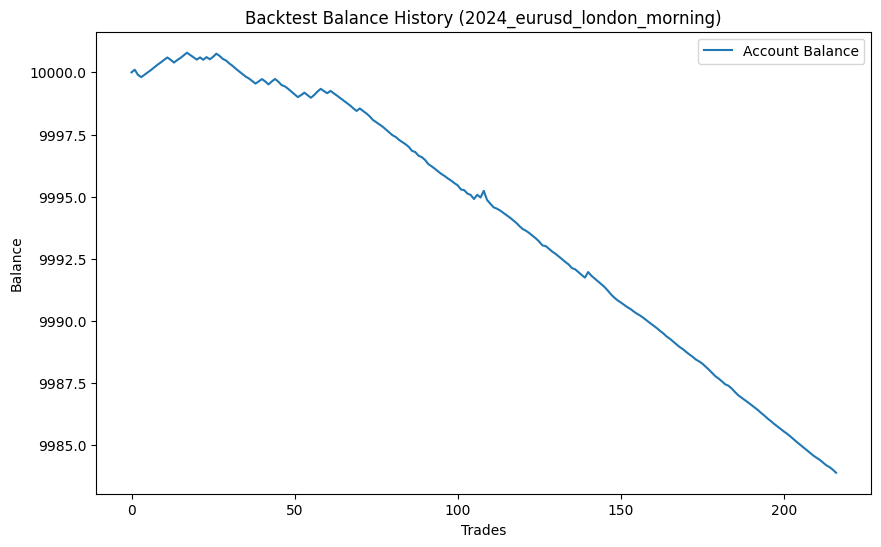

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 249
Training days: 149, Testing days: 49, Backtesting days: 51
{'Accuracy': 0.527681660899654, 'Confusion Matrix': array([[ 99, 162],
       [111, 206]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.38      0.42       261\n           1       0.56      0.65      0.60       317\n\n    accuracy                           0.53       578\n   macro avg       0.52      0.51      0.51       578\nweighted avg       0.52      0.53      0.52       578\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 474
      tick                   datetime    price  predicted  actual  fx_return  \
0    10393  2024-10-21 03:01:00-04:00  149.643          1       1   0.081582   
1    10394  2024-10-21 03:14:00-04:00  149.743    

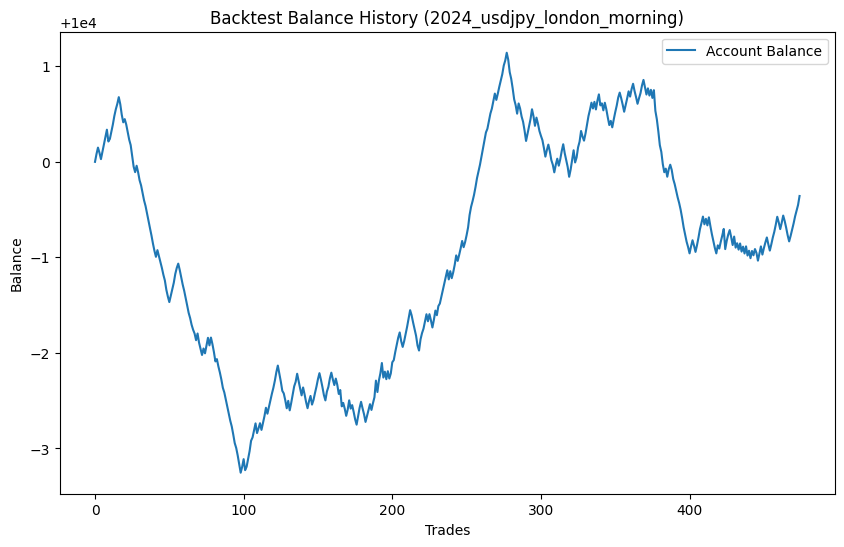

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 171
Training days: 102, Testing days: 34, Backtesting days: 35
{'Accuracy': 0.49056603773584906, 'Confusion Matrix': array([[ 7, 23],
       [ 4, 19]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.64      0.23      0.34        30\n           1       0.45      0.83      0.58        23\n\n    accuracy                           0.49        53\n   macro avg       0.54      0.53      0.46        53\nweighted avg       0.56      0.49      0.45        53\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 78
    tick                   datetime    price  predicted  actual  fx_return  \
0    916  2024-10-30 04:01:00-04:00  0.83292          1       1   0.147849   
1    917  2024-10-30 04:55:00-04:00  0.83392          1  

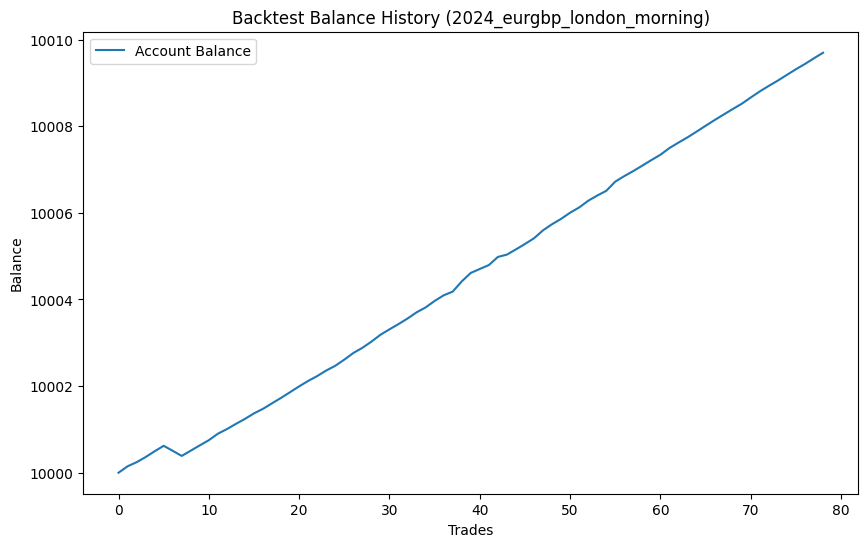

In [7]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 260
Training days: 156, Testing days: 52, Backtesting days: 52
{'Accuracy': 0.5365853658536586, 'Confusion Matrix': array([[242,   7],
       [221,  22]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.97      0.68       249\n           1       0.76      0.09      0.16       243\n\n    accuracy                           0.54       492\n   macro avg       0.64      0.53      0.42       492\nweighted avg       0.64      0.54      0.42       492\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 549
     tick                   datetime    price  predicted  actual  fx_return  \
0    3815  2024-10-18 09:13:00-04:00  1.30584          0       1   0.083532   
1    3816  2024-10-18 09:55:00-04:00  1.30484      

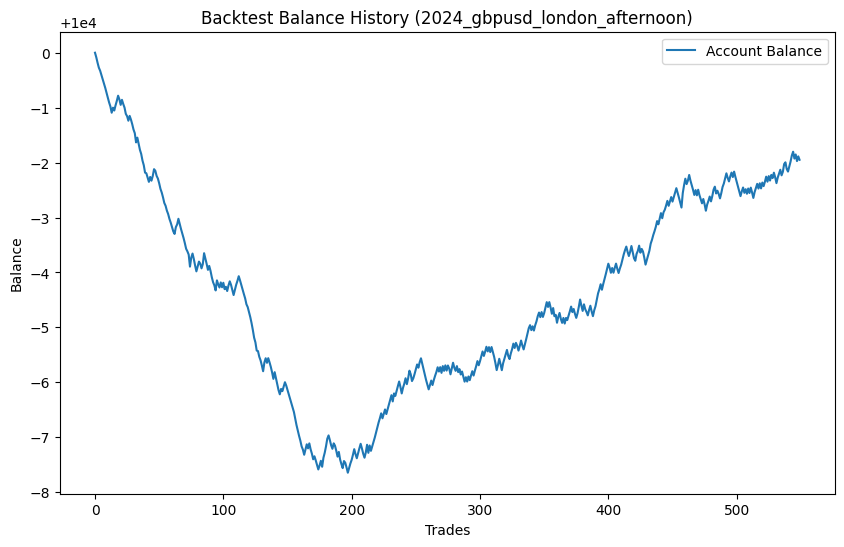

Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52


c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


{'Accuracy': 0.5511551155115512, 'Confusion Matrix': array([[150,  14],
       [122,  17]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.55      0.91      0.69       164\n           1       0.55      0.12      0.20       139\n\n    accuracy                           0.55       303\n   macro avg       0.55      0.52      0.44       303\nweighted avg       0.55      0.55      0.46       303\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 423
     tick                   datetime    price  predicted  actual  fx_return  \
0    2272  2024-10-18 08:33:00-04:00  1.08527          1       1   0.094069   
1    2273  2024-10-18 09:13:00-04:00  1.08627          0       1   0.090295   
2    2274  2024-10-18 09:55:00-04:00  1.08527          0

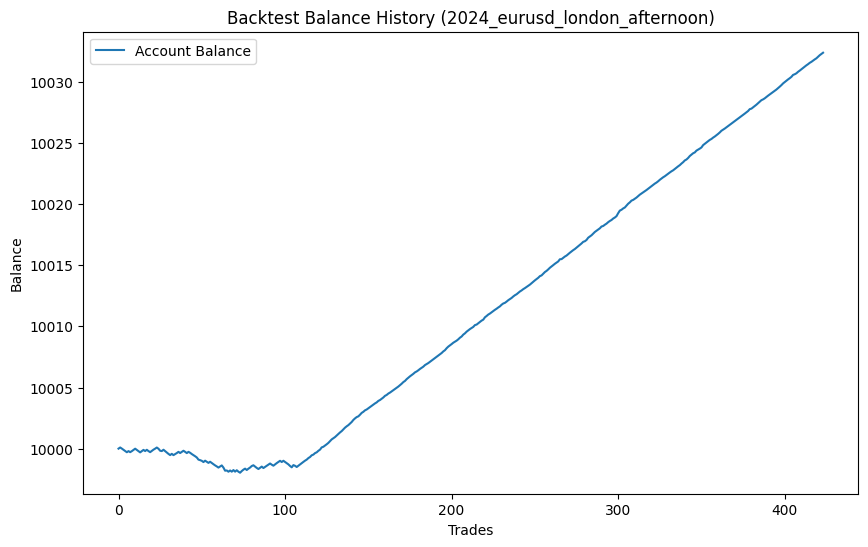

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
Training days: 154, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.5203735144312394, 'Confusion Matrix': array([[278, 311],
       [254, 335]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.47      0.50       589\n           1       0.52      0.57      0.54       589\n\n    accuracy                           0.52      1178\n   macro avg       0.52      0.52      0.52      1178\nweighted avg       0.52      0.52      0.52      1178\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 914
      tick                   datetime    price  predicted  actual  fx_return  \
0    10337  2024-10-17 07:45:00-04:00  149.543          1       0  -0.075516   
1    10338  2024-10-17 08:31:00-04:00  149.943   

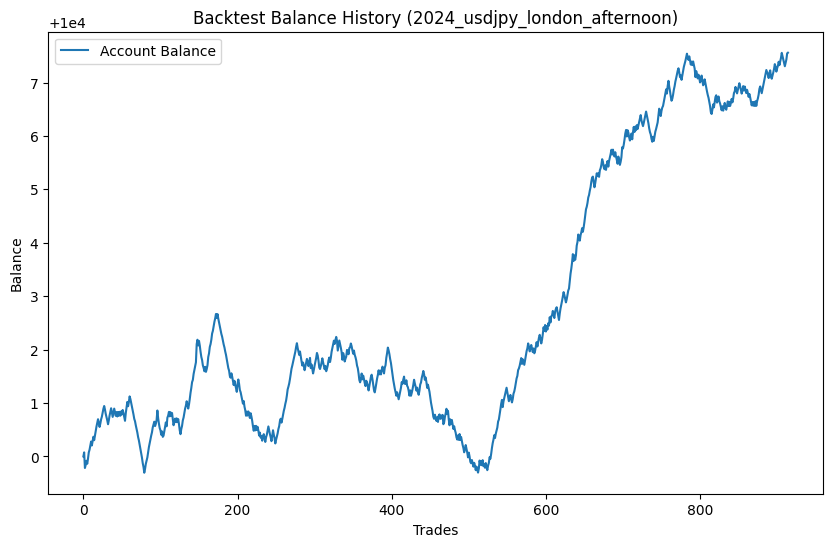

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 215
Training days: 129, Testing days: 43, Backtesting days: 43
{'Accuracy': 0.4942528735632184, 'Confusion Matrix': array([[16, 34],
       [10, 27]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.62      0.32      0.42        50\n           1       0.44      0.73      0.55        37\n\n    accuracy                           0.49        87\n   macro avg       0.53      0.52      0.49        87\nweighted avg       0.54      0.49      0.48        87\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 124
     tick                   datetime    price  predicted  actual  fx_return  \
0     910  2024-10-29 07:38:00-04:00  0.83092          1       0  -0.111799   
1     911  2024-10-29 08:06:00-04:00  0.82992          

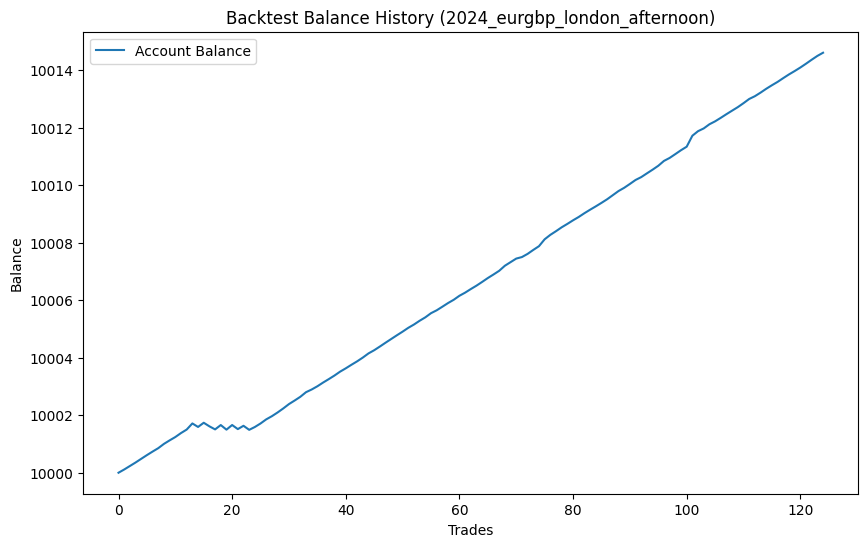

In [8]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_afternoon"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 262
Training days: 157, Testing days: 52, Backtesting days: 53
{'Accuracy': 0.49846153846153846, 'Confusion Matrix': array([[304,  17],
       [309,  20]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.95      0.65       321\n           1       0.54      0.06      0.11       329\n\n    accuracy                           0.50       650\n   macro avg       0.52      0.50      0.38       650\nweighted avg       0.52      0.50      0.38       650\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 690
     tick                   datetime    price  predicted  actual  fx_return  \
0    3815  2024-10-18 09:13:00-04:00  1.30584          0       1   0.083532   
1    3816  2024-10-18 09:55:00-04:00  1.30484     

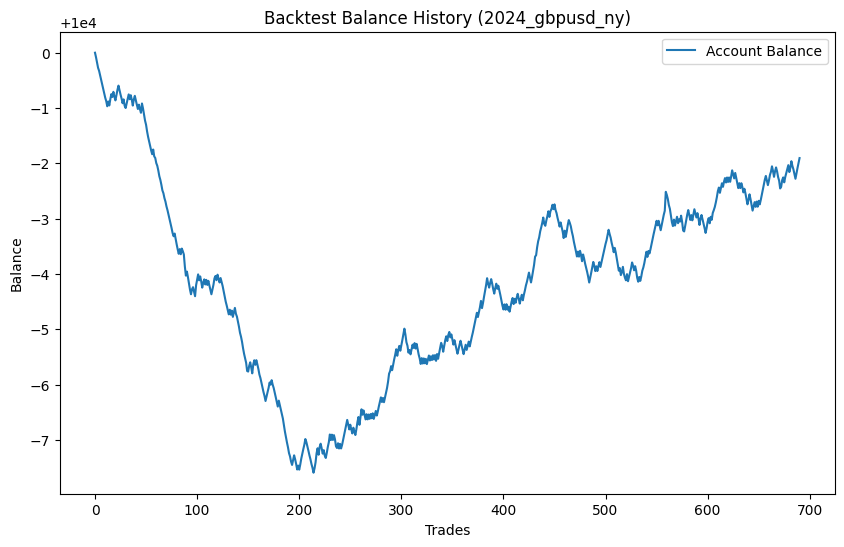

Unique session days: 255
Training days: 153, Testing days: 51, Backtesting days: 51


c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


{'Accuracy': 0.5123762376237624, 'Confusion Matrix': array([[190,  18],
       [179,  17]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.91      0.66       208\n           1       0.49      0.09      0.15       196\n\n    accuracy                           0.51       404\n   macro avg       0.50      0.50      0.40       404\nweighted avg       0.50      0.51      0.41       404\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 533
     tick                   datetime    price  predicted  actual  fx_return  \
0    2277  2024-10-21 10:23:00-04:00  1.08427          0       0  -0.095835   
1    2278  2024-10-21 11:04:00-04:00  1.08327          1       0  -0.091315   
2    2279  2024-10-21 11:51:00-04:00  1.08227          1

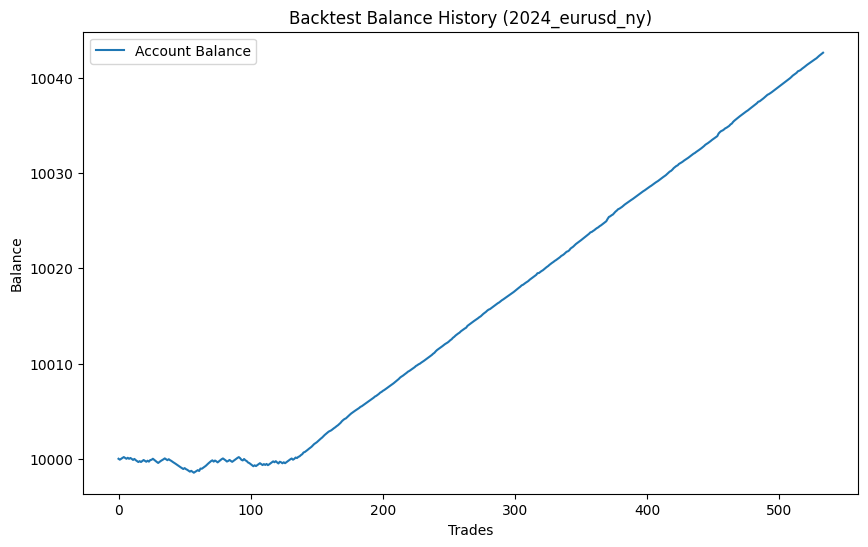

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 263
Training days: 157, Testing days: 52, Backtesting days: 54
{'Accuracy': 0.5228267667292058, 'Confusion Matrix': array([[380, 421],
       [342, 456]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.47      0.50       801\n           1       0.52      0.57      0.54       798\n\n    accuracy                           0.52      1599\n   macro avg       0.52      0.52      0.52      1599\nweighted avg       0.52      0.52      0.52      1599\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 1115
       tick                   datetime    price  predicted  actual  fx_return  \
0     10338  2024-10-17 08:31:00-04:00  149.943          0       1   0.291590   
1     10339  2024-10-17 08:32:00-04:00  150.04

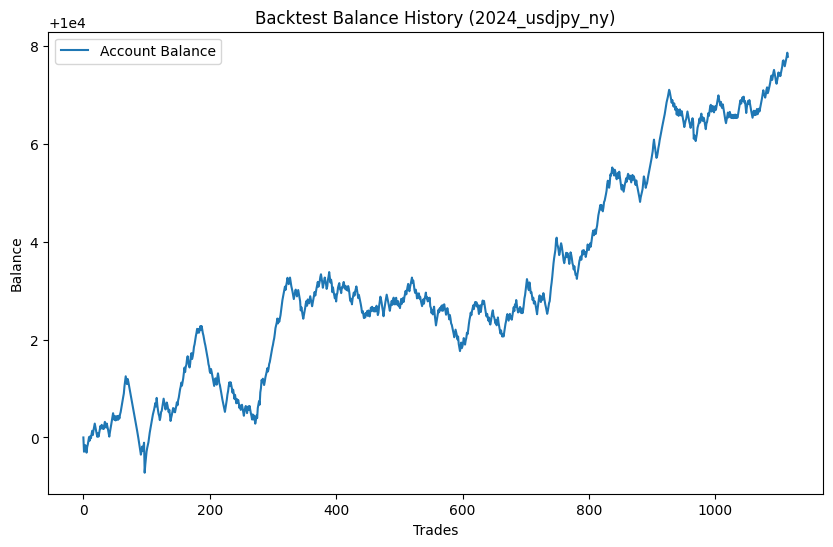

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 220
Training days: 132, Testing days: 44, Backtesting days: 44
{'Accuracy': 0.43478260869565216, 'Confusion Matrix': array([[10, 41],
       [11, 30]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.20      0.28        51\n           1       0.42      0.73      0.54        41\n\n    accuracy                           0.43        92\n   macro avg       0.45      0.46      0.41        92\nweighted avg       0.45      0.43      0.39        92\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 137
     tick                   datetime    price  predicted  actual  fx_return  \
0     903  2024-10-27 16:07:00-04:00  0.83192          1       0  -0.128464   
1     911  2024-10-29 08:06:00-04:00  0.82992         

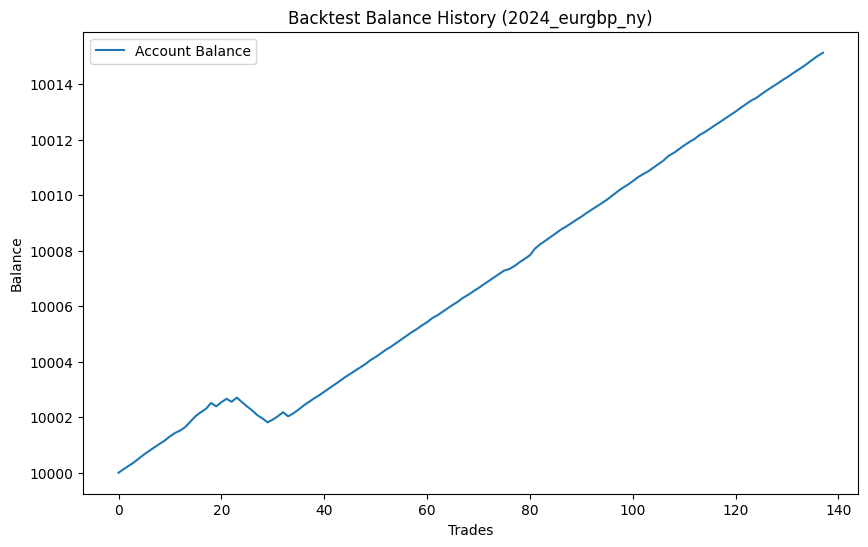

In [9]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
Training days: 154, Testing days: 51, Backtesting days: 53
{'Accuracy': 0.54292343387471, 'Confusion Matrix': array([[204,  13],
       [184,  30]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.94      0.67       217\n           1       0.70      0.14      0.23       214\n\n    accuracy                           0.54       431\n   macro avg       0.61      0.54      0.45       431\nweighted avg       0.61      0.54      0.46       431\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 489
     tick                   datetime    price  predicted  actual  fx_return  \
0    3792  2024-10-17 08:07:00-04:00  1.30184          1       1   0.082254   
1    3793  2024-10-17 08:31:00-04:00  1.29984        

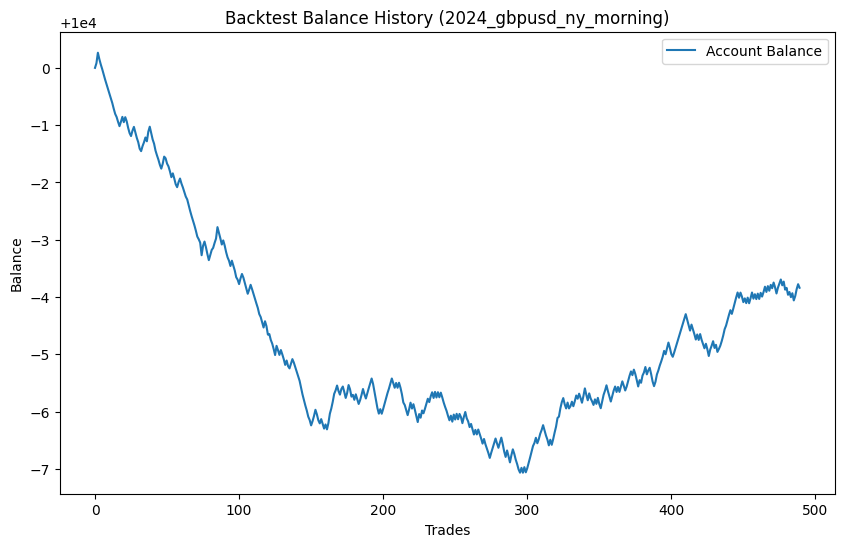

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 253
Training days: 151, Testing days: 50, Backtesting days: 52
{'Accuracy': 0.5457875457875457, 'Confusion Matrix': array([[134,  12],
       [112,  15]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.92      0.68       146\n           1       0.56      0.12      0.19       127\n\n    accuracy                           0.55       273\n   macro avg       0.55      0.52      0.44       273\nweighted avg       0.55      0.55      0.46       273\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 374
     tick                   datetime    price  predicted  actual  fx_return  \
0    2261  2024-10-17 08:31:00-04:00  1.08427          0       0  -0.214492   
1    2262  2024-10-17 09:09:00-04:00  1.08327      

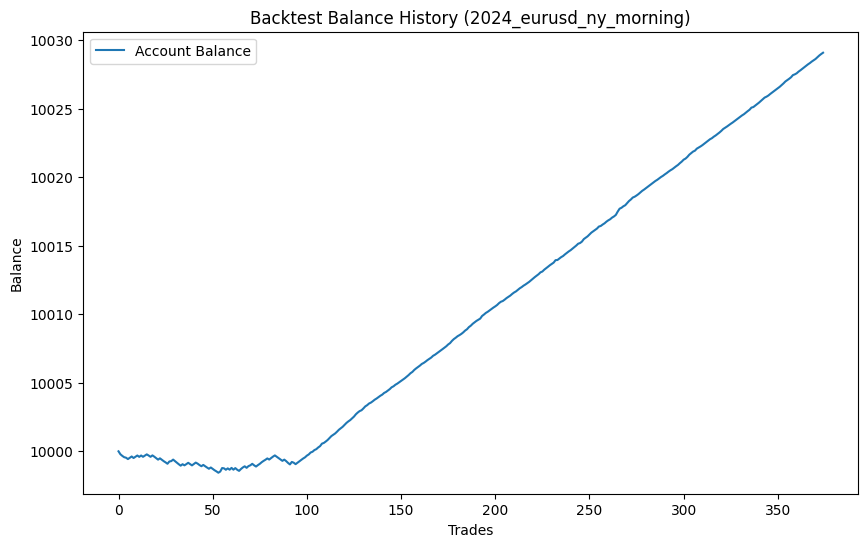

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
Training days: 154, Testing days: 51, Backtesting days: 52
{'Accuracy': 0.5351976856316297, 'Confusion Matrix': array([[243, 274],
       [208, 312]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.47      0.50       517\n           1       0.53      0.60      0.56       520\n\n    accuracy                           0.54      1037\n   macro avg       0.54      0.54      0.53      1037\nweighted avg       0.54      0.54      0.53      1037\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 782
      tick                   datetime    price  predicted  actual  fx_return  \
0    10368  2024-10-18 08:32:00-04:00  149.943          1       0  -0.087296   
1    10369  2024-10-18 08:38:00-04:00  149.843   

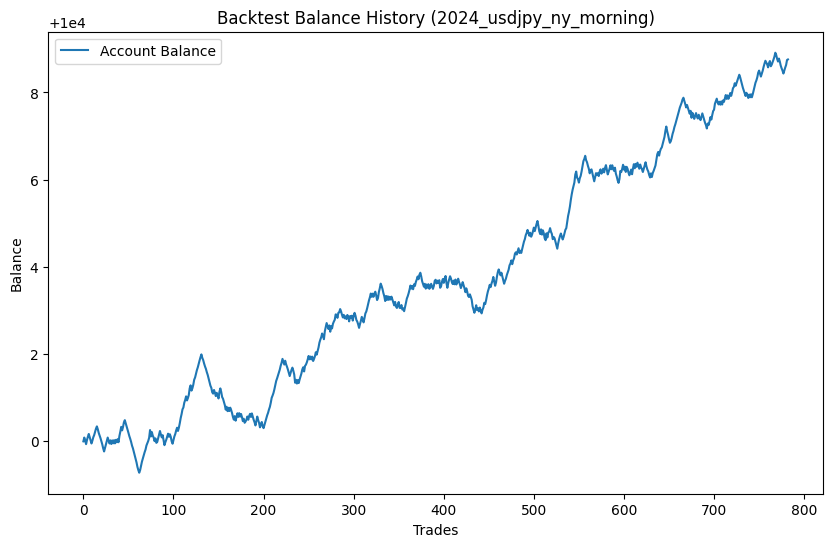

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 204
Training days: 122, Testing days: 40, Backtesting days: 42
{'Accuracy': 0.5428571428571428, 'Confusion Matrix': array([[33,  7],
       [25,  5]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.57      0.82      0.67        40\n           1       0.42      0.17      0.24        30\n\n    accuracy                           0.54        70\n   macro avg       0.49      0.50      0.46        70\nweighted avg       0.50      0.54      0.49        70\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 108
     tick                   datetime    price  predicted  actual  fx_return  \
0     911  2024-10-29 08:06:00-04:00  0.82992          0       0  -0.121552   
1     912  2024-10-29 08:22:00-04:00  0.83092          

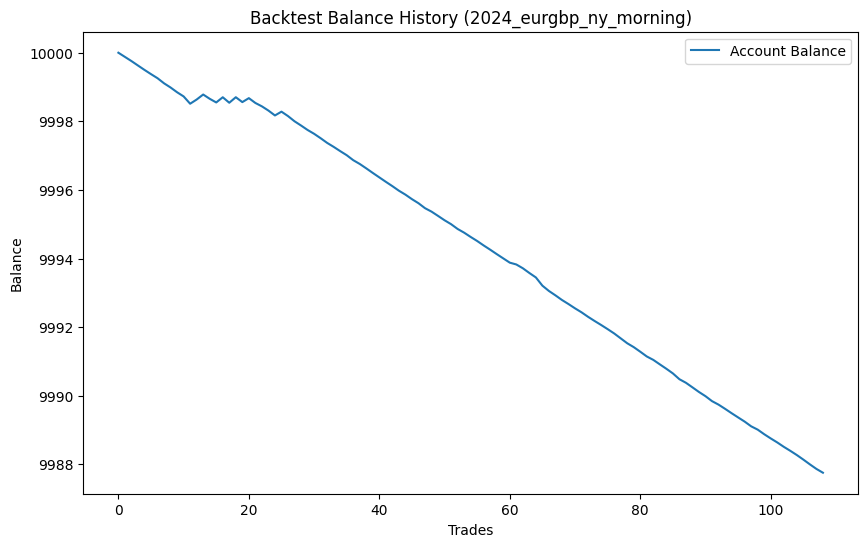

In [10]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 234
Training days: 140, Testing days: 46, Backtesting days: 48
{'Accuracy': 0.520618556701031, 'Confusion Matrix': array([[  0,  92],
       [  1, 101]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        92\n           1       0.52      0.99      0.68       102\n\n    accuracy                           0.52       194\n   macro avg       0.26      0.50      0.34       194\nweighted avg       0.28      0.52      0.36       194\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 203
     tick                   datetime    price  predicted  actual  fx_return  \
0    3878  2024-10-24 12:18:00-04:00  1.29484          1       0  -0.081029   
1    3879  2024-10-24 12:33:00-04:00  1.29584       

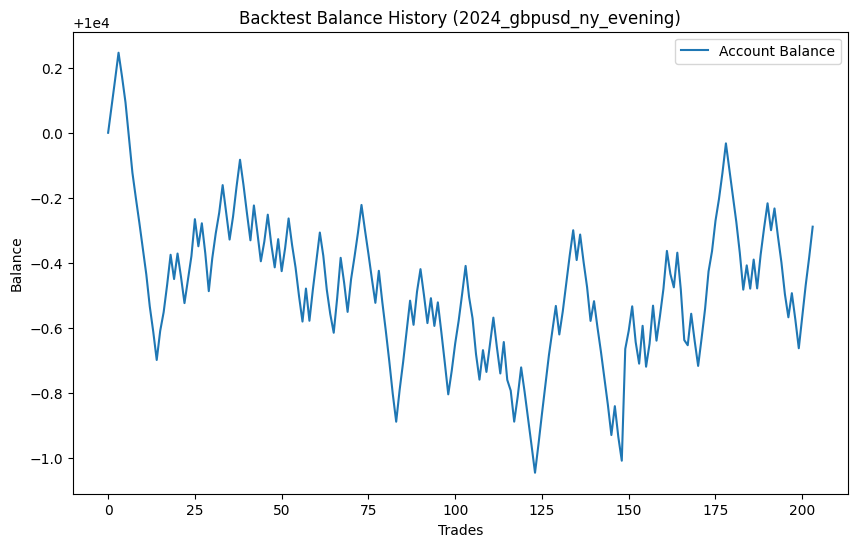

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 203
Training days: 121, Testing days: 40, Backtesting days: 42
{'Accuracy': 0.5555555555555556, 'Confusion Matrix': array([[22, 34],
       [14, 38]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.61      0.39      0.48        56\n           1       0.53      0.73      0.61        52\n\n    accuracy                           0.56       108\n   macro avg       0.57      0.56      0.55       108\nweighted avg       0.57      0.56      0.54       108\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 166
     tick                   datetime    price  predicted  actual  fx_return  \
0    2305  2024-10-24 13:02:00-04:00  1.08127          0       1   0.092567   
1    2306  2024-10-24 13:35:00-04:00  1.08227          

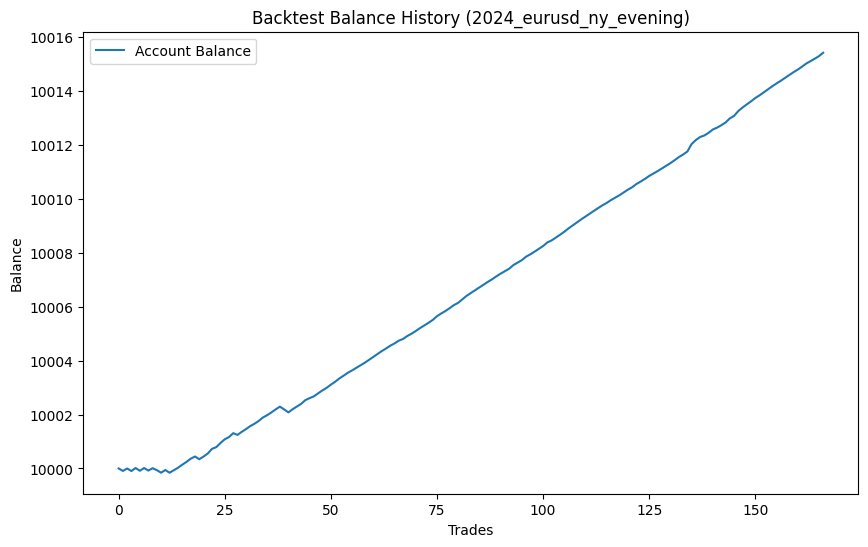

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 241
Training days: 144, Testing days: 48, Backtesting days: 49
{'Accuracy': 0.5128805620608899, 'Confusion Matrix': array([[ 77, 130],
       [ 78, 142]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.37      0.43       207\n           1       0.52      0.65      0.58       220\n\n    accuracy                           0.51       427\n   macro avg       0.51      0.51      0.50       427\nweighted avg       0.51      0.51      0.50       427\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 317
      tick                   datetime    price  predicted  actual  fx_return  \
0    10408  2024-10-21 12:47:00-04:00  150.543          0       1   0.053832   
1    10409  2024-10-21 13:15:00-04:00  150.643   

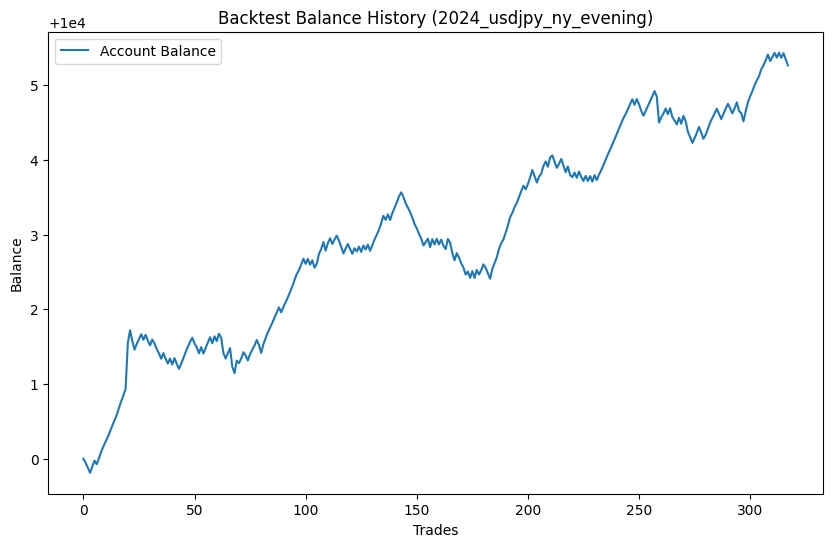

Unique session days: 99
Training days: 59, Testing days: 19, Backtesting days: 21


c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


{'Accuracy': 0.45, 'Confusion Matrix': array([[3, 8],
       [3, 6]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.27      0.35        11\n           1       0.43      0.67      0.52         9\n\n    accuracy                           0.45        20\n   macro avg       0.46      0.47      0.44        20\nweighted avg       0.47      0.45      0.43        20\n'}
Index(['tick_number', 'price', 'actual_openprice', 'ticks_moved', 'directions',
       'fx_return', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'target', 'date'],
      dtype='object')
Test set size: 29
    tick                   datetime    price  predicted  actual  fx_return  \
0    903  2024-10-27 16:07:00-04:00  0.83192          1       0  -0.128464   
1    913  2024-10-29 16:04:00-04:00  0.82992          1       0  -0.144418   
2    914  2024-10-29 16:16:00-04:00  0.83092          1       1   0.145832   
3   

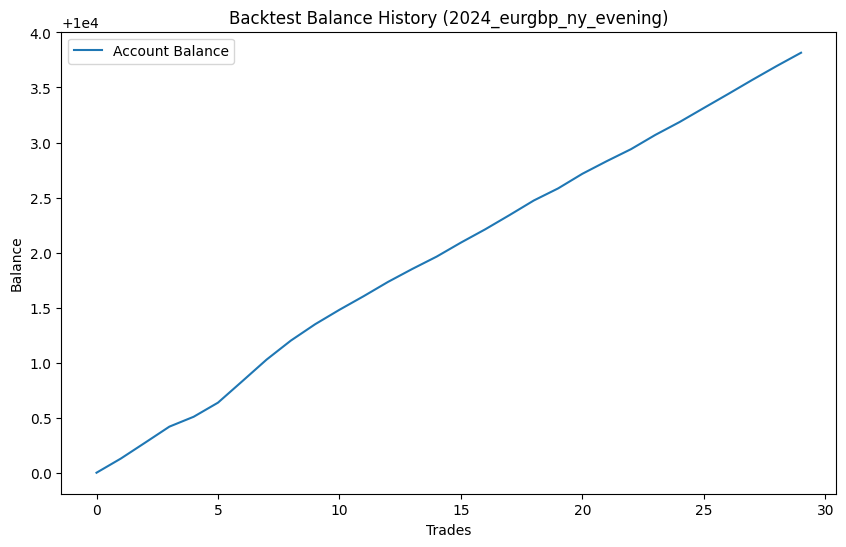

In [11]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_evening"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)